In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Planata

**Un aeroplanino di carta viene lanciato in orizzontale**

<center>
<img src="assets/paper-planes.jpg" width=65%/>
</center>

## Esercizio: Planata

**Consideriamo solo la componente verticale del moto**

Le due forze in gioco sono quelle di _gravità_:

$$F_g = -g m$$

* Dove $g$ è l'accelerazione di gravità e $m$ la massa

...E la forza di _trascinamento_ dell'aria:

$$F_t = -\frac{1}{2} \rho A C_D v |v|$$

* Dove $\rho$ è la densità dell'aria
* ...$A$ la superficie dell'aereoplano
* ...$C_D$ il coefficiente di trascinamento
* ...E $v$ è la componente verticale della velocità

## Esercizio: Planata

**Complessivamente il modo è descritto dall'equazione differenziale:**

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v}
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m} (F_g + F_t)
\end{array}\right)
$$


## Esercizio: Planata

**Prima di tutto, procediamo a caricare i dati del problema**

Potete farlo usando la cella seguente:

In [2]:
# Dati del problema
g = 9.80665
rho = 1.25 # Densita' dell'aria
A = 0.297 * 0.105 # Superficie esposta
Cd = 0.95 # Coefficiente di trascinamento
M = 0.005 # Massa

# Quota iniziale
y0 = 2

## Esercizio: Planata

**Nel modulo `sol.gliding` si definisca una classe:**

```python
class Dstate:
    def __init__(self, g, rho, A, Cd, M):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato fornito nella cella ed il tempo $t_0 = 0$

In [3]:
from sol import gliding
import numpy as np

X0 = np.array([y0, 0])
t0 = 0

dstate = gliding.Dstate(g, rho, A, Cd, M)
dstate(X=X0, t=t0)

array([ 0.     , -9.80665])

## Esercizio: Planata

**Nel modulo `sol.gliding` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento dell'aeroplanino:

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `base.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento dell'aeroplanino**

* Per un periodo di 1.5 secondi
* ...A partire dallo stato iniziale indicato nella cella

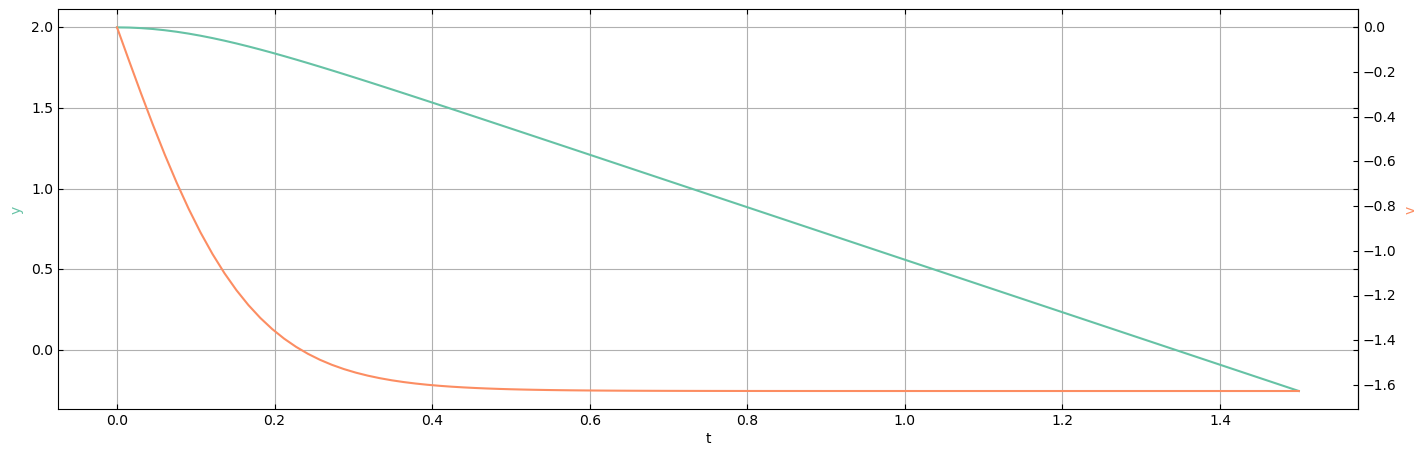

In [4]:
from scipy.integrate import odeint

X0 = np.array([y0, 0])
t = np.linspace(0, 1.5, 100)

X, t = gliding.simulate(dstate, X0, t)

## Esercizio: Planata

**Nel modulo `sol.gliding` si definisca una funzione:**

```python
def y_at_1sec(X, t)
```

* Che restituisca il valore della quota dopo 1 secondo

Si stampi a video il risultato

In [5]:
print(f'Quota dopo 1 secondo: {gliding.y_at_1sec(X, t)}')

Quota dopo 1 secondo: 0.5598613262504355
